【拟合模式：多项式】
拟合得到的功率公式： P = 0.039 + 0.945·T + 2.945·D + 0.151·(T·D) + 0.051·(T·D²) + 1.343·(T·D³)
真实生成功率公式： P = T + 3·D + 1.5·(T·D³) + 噪声
拟合优度 R² = 0.9806


f:\JupyterNotebook\Company\.v\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21151 (\N{CJK UNIFIED IDEOGRAPH-529F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
f:\JupyterNotebook\Company\.v\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
f:\JupyterNotebook\Company\.v\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
f:\JupyterNotebook\Company\.v\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
f:\JupyterNotebook\Company\.v\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missin

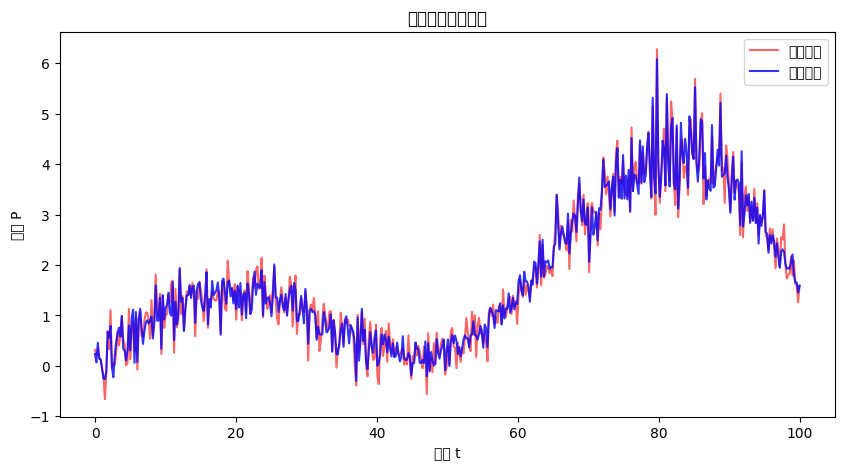

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

# ==========================
# 1. 构造数据
# ==========================
np.random.seed(0)
t = np.linspace(0, 100, 500)
T = np.sin(0.1 * t) + 0.05 * np.random.randn(len(t))  # 温度
D = np.linspace(0, 1, len(t)) + 0.1 * np.random.randn(len(t))  # 光斑
P = T + 3 * D + 1.5 * T * D**3 + 0.2 * np.random.randn(len(t))  # 功率 (真实公式)

# ==========================
# 2. 定义拟合模式
# ==========================
mode = "poly"  # 可改为 "power"

# ==========================
# 3. 多项式模式 (线性回归)
# ==========================
if mode == "poly":
    # 构造特征矩阵：T, D, T*D, T*D^2, T*D^3 ...
    X = np.column_stack([T, D, T * D, T * D**2, T * D**3])
    model = LinearRegression()
    model.fit(X, P)
    P_fit = model.predict(X)

    coeffs = model.coef_
    intercept = model.intercept_

    # 打印拟合公式
    formula_fit = (
        f"P = {intercept:.3f}"
        f" + {coeffs[0]:.3f}·T"
        f" + {coeffs[1]:.3f}·D"
        f" + {coeffs[2]:.3f}·(T·D)"
        f" + {coeffs[3]:.3f}·(T·D²)"
        f" + {coeffs[4]:.3f}·(T·D³)"
    )
    print("【拟合模式：多项式】")
    print("拟合得到的功率公式：", formula_fit)

# ==========================
# 4. 幂函数模式 (非线性曲线拟合)
# ==========================
elif mode == "power":

    def power_func(vars, a, b, c):
        T, D = vars
        return a * (T + 1) ** b * (D + 1) ** c  # 避免负值问题，+1平移

    popt, _ = curve_fit(power_func, (T, D), P, p0=[1, 1, 1], maxfev=10000)
    a, b, c = popt
    P_fit = power_func((T, D), a, b, c)

    formula_fit = f"P = {a:.3f} · (T+1)^{b:.3f} · (D+1)^{c:.3f}"
    print("【拟合模式：幂函数】")
    print("拟合得到的功率公式：", formula_fit)

# ==========================
# 5. 打印真实公式
# ==========================
formula_true = "P = T + 3·D + 1.5·(T·D³) + 噪声"
print("真实生成功率公式：", formula_true)

# ==========================
# 6. 计算并打印 R²
# ==========================
r2 = r2_score(P, P_fit)
print(f"拟合优度 R² = {r2:.4f}")

# ==========================
# 7. 可视化
# ==========================
plt.figure(figsize=(10, 5))
plt.plot(t, P, label="真实功率", color="red", alpha=0.6)
plt.plot(t, P_fit, label="拟合功率", color="blue", alpha=0.8)
plt.xlabel("时间 t")
plt.ylabel("功率 P")
plt.legend()
plt.title("功率拟合结果对比")
plt.show()